Gradient Boosted Machines trained on data subsets

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import glob
import os
from optichill import bas_filter

%matplotlib inline

c:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Summer 2017 Training Data

Trained plant with 2017 May, June, and July minute data
Tested data from the rest of the year

In [41]:
lst_train = ['Plt1 m 2017-05.csv', 'Plt1 m 2017-06.csv', 'Plt1 m 2017-07.csv']
lst_test = [
    'Plt1 m 2016-11.csv', 'Plt1 m 2016-11.csv', 'Plt1 m 2017-01.csv',
    'Plt1 m 2017-02.csv', 'Plt1 m 2017-03.csv', 'Plt1 m 2017-04.csv',
    'Plt1 m 2017-08.csv', 'Plt1 m 2017-09.csv', 'Plt1 m 2017-10.csv',
    'Plt1 m 2017-11.csv', 'Plt1 m 2017-12.csv', 'Plt1 m 2018-01.csv',
    'Plt1 m 2018-02.csv', 'Plt1 m 2018-03.csv', 'Plt1 m 2018-04.csv'
]
# lst_train = ['Plt1 m 2017-07.csv']

In [42]:
df_train, df_test = bas_filter.train_single_plt(
    '../../Capstone/Plt1', lst_train, lst_test,
    '../../Capstone/Plt1/Plt1 Points List.xlsx',
    include_alarms=False, dim_remove=['CHWST', 'CDWVLV']
)
df_test.shape

Filtering Training Set
['../../Capstone/Plt1\\Plt1 m 2017-05.csv']
['../../Capstone/Plt1\\Plt1 m 2017-06.csv']
['../../Capstone/Plt1\\Plt1 m 2017-07.csv']
Descriptors in the points list that are not in the datasets.
CommunicationFailure_COV
CH3COM1F
CH3Ready
CH4COM1F
CH4Ready
CH4SURGE
CH5COM1F
CH5Ready
Original data contains 26496 points and 413 dimensions.
A PCHWP3Failed was noted and 799 datapoints were removed from the dataset.
A PCHWP4Failed was noted and 986 datapoints were removed from the dataset.
A PCHWP5Failed was noted and 986 datapoints were removed from the dataset.
A SCHWP3Failed was noted and 986 datapoints were removed from the dataset.
A SCHWP4Failed was noted and 986 datapoints were removed from the dataset.
A SCHWP5Failed was noted and 986 datapoints were removed from the dataset.
A CH3_CHWSTSP_Alarm was noted and 992 datapoints were removed from the dataset.
A CH3ALARM was noted and 5229 datapoints were removed from the dataset.
A CH3F was noted and 5229 datapoints w

(44808, 191)

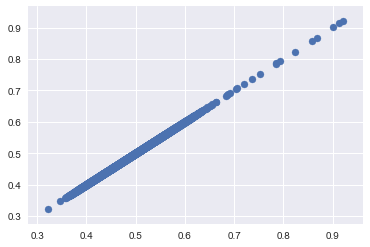

In [43]:
plt.scatter(df_train['kW/Ton'], df_train['kW/Ton'])

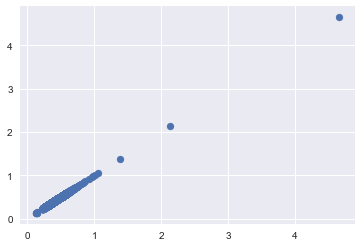

In [44]:
plt.scatter(df_test['kW/Ton'], df_test['kW/Ton'])

In [45]:
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [46]:
model = GradientBoostingRegressor(**params)

In [47]:
ytrain = df_train['kW/Ton'].values
ytest = df_test['kW/Ton'].values
xtrain = df_train.drop(['kW/Ton'], axis=1).values
xtest = df_test.drop(['kW/Ton'], axis=1).values

In [48]:
xtrain.shape

(9793, 190)

In [49]:
ytrain.shape

(9793,)

In [50]:
model.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [51]:
ypred = model.predict(xtest)

(0.1, 1.1)

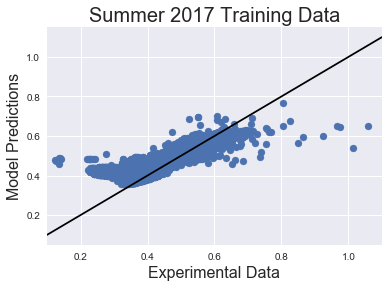

In [59]:
sns.set()
plt.figure()
plt.scatter(ytest, ypred)
fs = 20
plt.title("Summer 2017 Training Data", fontsize=fs)
plt.xlabel("Experimental Data", fontsize=fs-4)
plt.ylabel("Model Predictions", fontsize=fs-4)
plt.plot([0.1, 1.1], [0.1, 1.1], 'k')
# plt.savefig('r2_values_summer_plt1_2017.png', bbox_inches='tight')
plt.xlim(0.1, 1.1)

R2 value

In [53]:
test_score = r2_score(ytest, ypred)
test_score

0.6087076423735848

Feature Importance

In [45]:
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
x = df_test.drop(['kW/Ton'], axis=1).columns[sorted_idx]
imp = feature_importance[sorted_idx]

In [46]:
df_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [47]:
df_feats

,feat_import,feature_name
0,0.000000,CDWVLV2
1,0.000000,CH5CHWVLV
2,0.000000,CH5CDWVLV
3,0.000000,CH5AVAIL
4,0.000000,CH5ALARM
5,0.000000,CH5_CHWSTSP_Alarm
6,0.000000,CH4SURGECNT
7,0.000000,CH4SBoolean
8,0.000000,CH4S
9,0.000000,CH4PctLoad


In [48]:
df_feats.to_csv('Feat_imp_summer_test_plt1_2017.csv')